In [ ]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as p
%matplotlib inline

# for plotting stile, we utilize the seaborn library
import seaborn as sns
sns.set_context('talk')
sns.set_style('ticks')
from scipy import optimize

In [ ]:
# define the function
def fun(x,a,b,c,d,e):
    return a + b*x + c*x**2 + d/x + e/x**2

In [ ]:
data = p.read_csv('03_cp.dat')
data.head()

,Temp[C],cp[J/kgK]
0,40.0,881.113
1,45.0,889.392
2,50.0,896.739
3,55.0,904.091
4,60.0,911.635


In [ ]:
from pylab import *

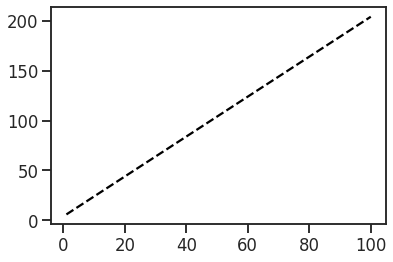

In [ ]:
x = linspace(1,100,100)
y = 2*x +4
plot(x,y,'k--')

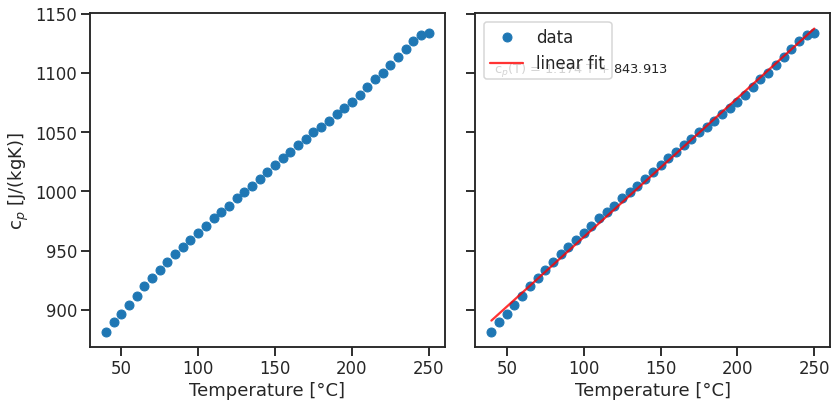

In [ ]:
fig, axs = plt.subplots(1,2,figsize=[12,6], sharey=True)
axs[0].plot(data['Temp[C]'], data['cp[J/kgK]'], 'o')
axs[0].set_xlabel('Temperature [°C]')
axs[0].set_ylabel('c$_p$ [J/(kgK)]')

# fit a linear equation to the data and calculate a simulated specific heat capacity cp_s
m, b = np.polyfit(data['Temp[C]'], data['cp[J/kgK]'], 1) 
temp_s = np.linspace(40,250,100)
cp_s = temp_s*m + b

axs[1].plot(data['Temp[C]'], data['cp[J/kgK]'], 'o', label='data')
axs[1].plot(temp_s, cp_s, 'r-',alpha=0.8, label='linear fit')
axs[1].set_xlabel('Temperature [°C]')
axs[1].legend()
axs[1].text(42, 1100, 
        'c$_p$(T) = {0:.3f} T + {1:.3f} '
        .format(*tuple((m,b))),fontsize=13)
plt.tight_layout()

In [ ]:
Tdat = data['Temp[C]']+273.15 # for the function, we need temperatures in Kelvin
cpdat = data['cp[J/kgK]']

# after defining the data, we perform a nonlinear regression using optimize.curve_fit
popt, pcov = optimize.curve_fit(fun,Tdat,cpdat)

temp_sK = temp_s+273.15 # regression temperature must be in K for the function
cpsim = fun(temp_sK,popt[0],popt[1],popt[2],popt[3],popt[4]) # fitted cp

Text(540, 1125, 'c$_p$(T) = 2807.940 + -4.107 T + 0.00402 T$^2$+ -326926.234 T$^-$$^1$ + 882334.996 T$^-$$^2$')

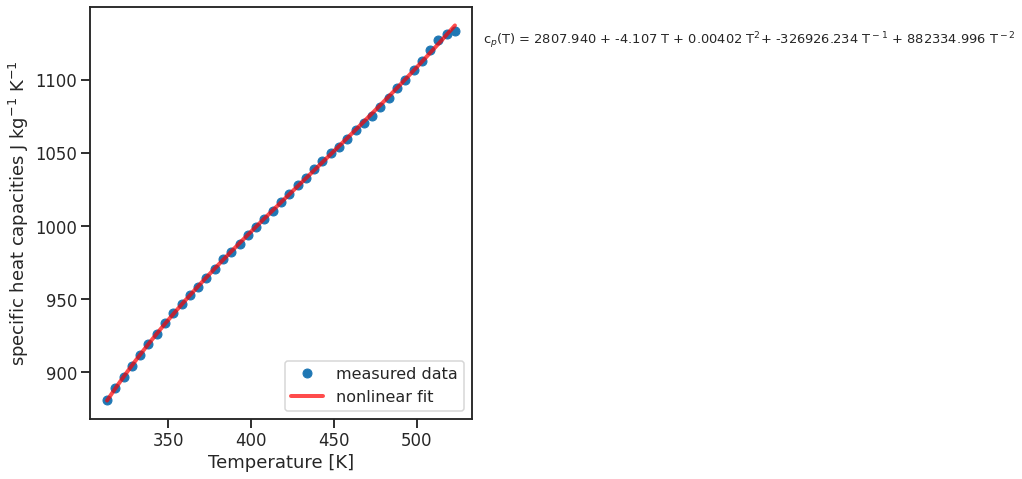

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,7))
ax.plot(Tdat,cpdat,'o', label="measured data") # plot just every nth point
ax.plot(temp_sK,cpsim,'r-',linewidth=4, alpha=0.7, label="nonlinear fit")
ax.legend(fontsize=16,loc=4)
ax.set_xlabel("Temperature [K]")
ax.set_ylabel("specific heat capacities J kg$^{-1}$ K$^{-1}$")
#m.rcParams.update({'font.size':15})
plt.tight_layout()
ax.text(540, 1125, 
        'c$_p$(T) = {0:.3f} + {1:.3f} T + {2:.5f} T$^2$+ {3:.3f} T$^-$$^1$ + {4:.3f} T$^-$$^2$'
        .format(*tuple(popt)),fontsize=13)